# Case Study 1 : Collecting Data from Twitter

Due Date: September 21, **BEFORE the beginning of class at 6:00pm**

## **NOTE: There are *always* last minute issues submitting the case studies.  DO NOT WAIT UNTIL THE LAST MINUTE!**

* ------------

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Twitter_bird_logo_2012.svg/220px-Twitter_bird_logo_2012.svg.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1
    
    member 2
    
    ...

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://www.learndatasci.com/wp-content/uploads/2015/08/Mining-the-Social-Web-2nd-Edition.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1: Sampling Twitter Data with Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [21]:
import twitter
import json
import io
import pandas as pd
#from urllib import unquote
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = '3nSNEP5MHx1z1LUGKZrwOdpNt'
    CONSUMER_SECRET ='RqxYyToyrmh52XeMZvsJMLAQYmbJCNsNI9cLEdh1wo9BsZ8mb6'
    OAUTH_TOKEN = '851673729746776064-QOWBfdTddxESi5ItVT4eJ09yBJ3ySuP'
    OAUTH_TOKEN_SECRET = 'fHOh5gy0yHAnCZwcpJQ9oY9jlJ7Rgs3Wr0Q0h9Bq86TQU'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

oauth = oauth_login()
print(oauth)

In [22]:
#collect data from twiter

q = '#iPhone 8 ' 
count =100

twitter_api = oauth_login()
WORLD_WOE_ID = 1
US_WOE_ID = 23424977

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

search_results = twitter_api.search.tweets(q = q, count = 100)
statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

with open('iphone8.json', 'w') as outfile:
    json.dump(statuses, outfile)


Length of statuses 80


### Report some statistics about the tweets you collected 

* The topic of interest: < INSERT YOUR TOPIC HERE>


* The total number of tweets collected:  < INSERT THE NUMBER HERE>

*-----------------------

# Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

+-------------------------+-------+
| Word                    | Count |
+-------------------------+-------+
| 8,                      |    18 |
| Plus                    |    15 |
| RT                      |    15 |
| 11                      |    15 |
| #App                    |    12 |
| @FindUnfollower         |    11 |
| me.                     |    11 |
| users                   |    11 |
| Via                     |    11 |
| X                       |    10 |
| &amp;                   |     9 |
| GM                      |     8 |
| #apple                  |     7 |
| et                      |     7 |
| @iPhoneAddictFr:        |     6 |
| build                   |     6 |
| selon                   |     6 |
| #Apple                  |     6 |
| https:/…                |     6 |
| 1                       |     6 |
| Leaked                  |     6 |
| X,                      |     6 |
| s’appelleront           |     6 |
| Les                     |     6 |
| unfollowed              | 

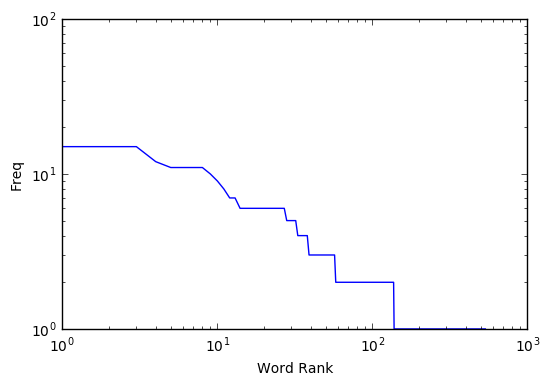

In [36]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import collections
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
#mport nltk
import string
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.corpus import stopwords
#nltk.download("stopwords")
def unwantWords():
    unwant = list(stopwords.words('english'))
    unwant += ['#iPhone', 'iPhone', 'iOS', '#iphone', '8', 'https', 'http']
    unwant += list(string.punctuation)
    return unwant

statues = json.loads(open('iphone8.json').read())
status_texts = [ status['text'] 
                 for status in statuses ]
words = []
unwantwords = unwantWords()
for t in status_texts: 
    for w in t.split():
        if w not in unwantwords:
            words.append(w)
            
c= collections.Counter(words)
pt = PrettyTable(field_names=['Word', 'Count'])
[pt.add_row(row) for row in c.most_common()[:30]]
pt.align["Word"], pt.align['Count'] = 'l', 'r'
print(pt)

word_counts = sorted(c.values(), reverse=True)
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")


**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [24]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

retweets = [(status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            for status in statuses 
                  if 'retweeted_status' in status]

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 75    | iPhoneAddictFr | RT @iPhoneAddictFr: Les nouveaux #iPhone           |
|       |                | s’appelleront #iPhone 8, #iPhone 8 Plus et #iPhone |
|       |                | X, selon iOS 11 https://t.co/pcq3ZOe7ZR https:/…   |
| 75    | iPhoneAddictFr | RT @iPhoneAddictFr: Les nouveaux #iPhone           |
|       |                | s’appelleront #iPhone 8, #iPhone 8 Plus et #iPhone |
|       |                | X, selon iOS 11 https://t.co/pcq3ZOe7ZR https:/…   |
| 75    | iPhoneAddictFr | RT @iPhoneAddictFr: Les nouveaux #iPhone           |
|       |                | s’appelleront #iPhone 8, #iPhone 8 Plus et #iPhone |
|       |                | X, selon iOS 11 https://t.co/pcq3ZOe7ZR https:/…   |
| 75    | iPhoneAddictFr | RT @iPhoneAdd

**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [37]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] 
                     #  if   hashtag['text'] not in unwantwords
           ]
c = collections.Counter(hashtags)
pt = PrettyTable(field_names=['Hashtags', 'Count'])
[pt.add_row(row) for row in c.most_common()[:10]]
print(pt)

usermentions =[mention['name'] 
             for status in statuses
                 for mention in status['entities']['user_mentions'] ]

c = collections.Counter(usermentions)
pt = PrettyTable(field_names=['User Mentions', 'Count'])
[pt.add_row(row) for row in c.most_common()[:10]]
print(pt)



+-------------+-------+
|   Hashtags  | Count |
+-------------+-------+
|    iPhone   |   76  |
|    iphone   |   18  |
|     App     |   12  |
|    Apple    |   8   |
|    apple    |   7   |
|    iPHONE   |   4   |
|     iOS     |   4   |
|   gamedev   |   4   |
| imessageapp |   3   |
|     iPad    |   3   |
+-------------+-------+
+---------------------+-------+
|    User Mentions    | Count |
+---------------------+-------+
|   Find Unfollowers  |   11  |
| iPhoneAddict.fr  📱 |   6   |
|     iPhone News     |   2   |
|    Hyper Retweets   |   1   |
|       DNR_CREW      |   1   |
|    OpTic ReTweet    |   1   |
|    FameRTs 38.7K    |   1   |
|   Fastest Retweets  |   1   |
|     TheApplePips    |   1   |
|        Apple        |   1   |
+---------------------+-------+


* ------------------------

# Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [2]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [3]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

*------------------------

# Problem 4: Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a business question that Twitter data could help answer.
* Decribe the business case.
* How could Twitter data help a company decide how to spend its resources.

In [4]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 1 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

** Totoal Points: 120 **


---------------------------------------------------------------------------
** Notebook:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API.  Come up with a business question and describe how Twitter data can help you answer that question.




---------------------------------------------------------------------------
** Report: communicate the results**
    Points: 20

(1) What data you collected?
    Points: 5 

(2) Why this topic is interesting or important to you? (Motivations)
    Points: 5 

(3) How did you analyse the data?
    Points: 5 

(4) What did you find in the data?
(please include figures or tables in the report, but no source code)
    Points: 5 



---------------------------------------------------------------------------
** Slides (for 10 minutes of presentation): Story-telling **
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

